# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [201]:
# Import relevant libraries
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime
from splinter import Browser
from bs4 import BeautifulSoup
from webdriver_manager.chrome import ChromeDriverManager
# Setup splinter
executable_path = ChromeDriverManager().install()
#browser = Browser('chrome', executable_path, headless=False)


In [167]:
browser=Browser('chrome', executable_path=executable_path)

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [168]:
# Visit the website
# 
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.visit(url)


### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [169]:
# Create a Beautiful Soup Object
soup = BeautifulSoup(browser.html, "html.parser")
soup

<html lang="en"><head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="" name="description"/>
<title>Mars Temperature Data</title>
<link href="css/bootstrap.min.5.2.2.css" rel="stylesheet" type="text/css"/>
<link href="css/temp.css" rel="stylesheet" type="text/css"/>
</head>
<body>
<main>
<div class="container py-4">
<header class="pb-3 mb-4 border-bottom">
<a class="d-flex align-items-center text-dark text-decoration-none" href="/">
<span class="fs-4">Mission To Mars</span>
</a>
</header>
<div class="p-5 mb-4 bg-light rounded-3">
<div class="container-fluid py-5">
<h1 class="display-5 fw-bold">Mars Temperature Data</h1>
<p class="col-md-8 fs-4">This is Mars data.</p>
<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>

In [170]:
# Extract all rows of data
row_data = soup.find_all('tr', class_="data-row")

row_data


[<tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>,
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>,
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>,
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>68</td>
 <td>2012-08-22</td>
 <td>16</td>
 <td>158</td>
 <td>6</td>
 <td>-77.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>79</td>
 <td>2012-08-

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [171]:
tables = pd.read_html(url)
tables

[        id terrestrial_date   sol   ls  month  min_temp  pressure
 0        2       2012-08-16    10  155      6     -75.0     739.0
 1       13       2012-08-17    11  156      6     -76.0     740.0
 2       24       2012-08-18    12  156      6     -76.0     741.0
 3       35       2012-08-19    13  157      6     -74.0     732.0
 4       46       2012-08-20    14  157      6     -74.0     740.0
 ...    ...              ...   ...  ...    ...       ...       ...
 1862  1889       2018-02-23  1973  133      5     -78.0     730.0
 1863  1892       2018-02-24  1974  134      5     -77.0     729.0
 1864  1894       2018-02-25  1975  134      5     -76.0     729.0
 1865  1893       2018-02-26  1976  135      5     -77.0     728.0
 1866  1895       2018-02-27  1977  135      5     -77.0     727.0
 
 [1867 rows x 7 columns]]

In [172]:
# Find the table
table1 = soup.find('table', class_='table')
table1.text

'\n\nid\nterrestrial_date\nsol\nls\nmonth\nmin_temp\npressure\n\n\n2\n2012-08-16\n10\n155\n6\n-75.0\n739.0\n\n\n13\n2012-08-17\n11\n156\n6\n-76.0\n740.0\n\n\n24\n2012-08-18\n12\n156\n6\n-76.0\n741.0\n\n\n35\n2012-08-19\n13\n157\n6\n-74.0\n732.0\n\n\n46\n2012-08-20\n14\n157\n6\n-74.0\n740.0\n\n\n57\n2012-08-21\n15\n158\n6\n-78.0\n740.0\n\n\n68\n2012-08-22\n16\n158\n6\n-77.0\n740.0\n\n\n79\n2012-08-23\n17\n159\n6\n-76.0\n742.0\n\n\n112\n2012-08-27\n21\n161\n6\n-74.0\n741.0\n\n\n114\n2012-08-28\n22\n162\n6\n-74.0\n742.0\n\n\n123\n2012-08-29\n23\n162\n6\n-75.0\n741.0\n\n\n134\n2012-08-30\n24\n163\n6\n-75.0\n742.0\n\n\n145\n2012-08-31\n25\n163\n6\n-75.0\n743.0\n\n\n156\n2012-09-01\n26\n164\n6\n-76.0\n745.0\n\n\n163\n2012-09-02\n27\n164\n6\n-75.0\n743.0\n\n\n170\n2012-09-03\n28\n165\n6\n-75.0\n745.0\n\n\n171\n2012-09-04\n29\n166\n6\n-75.0\n747.0\n\n\n172\n2012-09-05\n30\n166\n6\n-74.0\n747.0\n\n\n173\n2012-09-06\n31\n167\n6\n-74.0\n745.0\n\n\n175\n2012-09-08\n33\n168\n6\n-73.0\n748.0\n\n\n17

In [173]:
print(table1.text)



id
terrestrial_date
sol
ls
month
min_temp
pressure


2
2012-08-16
10
155
6
-75.0
739.0


13
2012-08-17
11
156
6
-76.0
740.0


24
2012-08-18
12
156
6
-76.0
741.0


35
2012-08-19
13
157
6
-74.0
732.0


46
2012-08-20
14
157
6
-74.0
740.0


57
2012-08-21
15
158
6
-78.0
740.0


68
2012-08-22
16
158
6
-77.0
740.0


79
2012-08-23
17
159
6
-76.0
742.0


112
2012-08-27
21
161
6
-74.0
741.0


114
2012-08-28
22
162
6
-74.0
742.0


123
2012-08-29
23
162
6
-75.0
741.0


134
2012-08-30
24
163
6
-75.0
742.0


145
2012-08-31
25
163
6
-75.0
743.0


156
2012-09-01
26
164
6
-76.0
745.0


163
2012-09-02
27
164
6
-75.0
743.0


170
2012-09-03
28
165
6
-75.0
745.0


171
2012-09-04
29
166
6
-75.0
747.0


172
2012-09-05
30
166
6
-74.0
747.0


173
2012-09-06
31
167
6
-74.0
745.0


175
2012-09-08
33
168
6
-73.0
748.0


176
2012-09-10
34
168
6
-73.0
748.0


177
2012-09-11
35
169
6
-73.0
749.0


178
2012-09-12
36
169
6
-73.0
750.0


179
2012-09-13
37
170
6
-73.0
750.0


180
2012-09-14
38
171
6
-73.0
750.0


181


In [174]:
# Create an empty list
# Loop through the scraped data to create a list of rows
# Store the table
headers = []
for i in table1.find_all('th'):
    title = i.text
    headers.append(title)
    

In [175]:
headers

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

In [176]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(columns = headers)
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure


In [177]:
# Create a for loop to fill mydata
for j in table1.find_all('tr')[1:]:
    row_data = j.find_all('td')
    row = [i.text for i in row_data]
    length = len(df)
    df.loc[length] = row


In [178]:
# Confirm DataFrame was created successfully
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [179]:
# Examine data type of each column
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 116.7+ KB


In [181]:
# Change data types for data analysis
df["id"] = df['id'].astype('int')

In [182]:
df["min_temp"] = df['min_temp'].astype('float')

In [183]:
df["pressure"] =df['pressure'].astype('float')

In [184]:
df["sol"]=df['sol'].astype('int')

In [185]:
df["ls"]=df["ls"].astype('int')

In [186]:
df["month"]=df["month"].astype('int')

In [187]:
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])

In [188]:
# Confirm type changes were successful by examining data types again
df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [189]:
# 1. How many months are there on Mars?
mars_months = np.unique(df['month'])

print(mars_months)


[ 1  2  3  4  5  6  7  8  9 10 11 12]


In [190]:
# 2. How many Martian days' worth of data are there?

# days = df['sol'].max() - df['sol'].min()
# print(df['sol'].agg(['max', 'min']))
sols=0
for mm in mars_months:
    sol_duration = df.loc[df['month'] == mm, 'sol'].max() - df.loc[df['month'] == mm, 'sol'].min()
    sols += (sol_duration / 24.66)
print(sols)   

675.7096512570965


In [191]:
# 3. What is the average low temperature by month?
# get table headers
headers = list(df)
mintemp_df =df[headers[2:]].groupby('month', as_index=False).mean().sort_values('min_temp')
mintemp_df

,month,sol,ls,min_temp,pressure
2,3,1204.406250,75.010417,-83.307292,877.322917
3,4,1244.500000,104.365979,-82.747423,806.329897
1,2,1175.853933,44.258427,-79.932584,889.455056
4,5,1182.691275,132.885906,-79.308725,748.557047
0,1,1077.574713,15.281609,-77.160920,862.488506
5,6,750.829932,164.897959,-75.299320,745.054422
11,12,990.951807,344.692771,-74.451807,842.156627
6,7,715.105634,194.894366,-72.281690,795.105634
10,11,947.224638,314.536232,-71.985507,857.014493
9,10,1034.669643,286.330357,-71.982143,887.312500


In [192]:
def barplot(x, y, title):
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.bar(x, y)
    ax.set_title(title)
    ax.set_xlabel(f'{title.split()[-2]} {title.split()[-1]}')
    ax.set_xticks(x)
    if 'min temperature' in title.lower():
        ax.set_ylabel('Min Temperature (\N{DEGREE SIGN}F)')
        ax.set_yticks(np.arange(0, -91, -10))
        figname = './Data/mars_mintemp.png'
    elif 'pressure' in title.lower():
        ax.set_ylabel('Pressure')
        ax.set_yticks(np.arange(0, 1001, 100))
        figname = './Data/mars_pressure.png'
    
#     # Save the figure.
#     fig.savefig(figname, bbox_inches='tight', facecolor='w')
#     # Show Figure
#     plt.show()

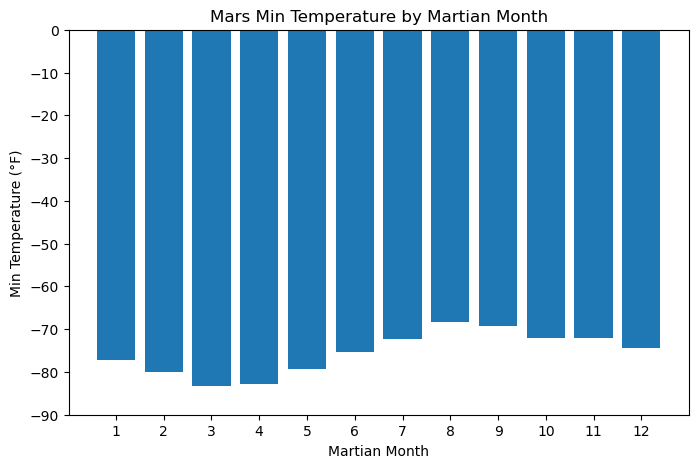

In [193]:
# Plot the average temperature by month
barplot(mintemp_df['month'], mintemp_df['min_temp'], 'Mars Min Temperature by Martian Month')

In [194]:
# Identify the coldest and hottest months in Curiosity's location
df.loc[(df['min_temp'] == df['min_temp'].min()) | (df['min_temp'] == df['min_temp'].max()), headers[1:]]





,terrestrial_date,sol,ls,month,min_temp,pressure
1093,2015-12-09,1188,79,3,-90.0,881.0
1582,2017-05-10,1692,2,1,-62.0,820.0


In [195]:
# 4. Average pressure by Martian month
minpress_df =df[headers[2:]].groupby('month', as_index=False).mean().sort_values('pressure')
minpress_df

,month,sol,ls,min_temp,pressure
5,6,750.829932,164.897959,-75.299320,745.054422
4,5,1182.691275,132.885906,-79.308725,748.557047
6,7,715.105634,194.894366,-72.281690,795.105634
3,4,1244.500000,104.365979,-82.747423,806.329897
11,12,990.951807,344.692771,-74.451807,842.156627
10,11,947.224638,314.536232,-71.985507,857.014493
0,1,1077.574713,15.281609,-77.160920,862.488506
7,8,795.333333,224.347518,-68.382979,873.829787
2,3,1204.406250,75.010417,-83.307292,877.322917
9,10,1034.669643,286.330357,-71.982143,887.312500


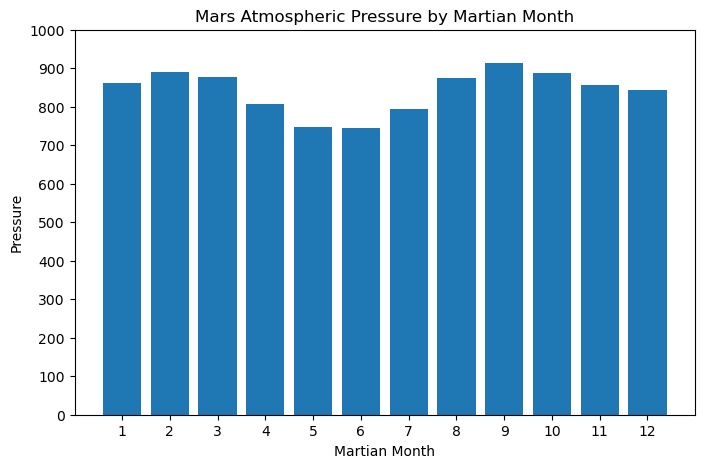

In [196]:
# Plot the average pressure by month
barplot(minpress_df['month'], minpress_df['pressure'], 'Mars Atmospheric Pressure by Martian Month')

In [197]:
# 5. How many terrestrial (earth) days are there in a Martian year?

ter_days = (df['terrestrial_date'].max() - df['terrestrial_date'].min()).days
print(df['terrestrial_date'].agg(['max', 'min']))

max   2018-02-27
min   2012-08-16
Name: terrestrial_date, dtype: datetime64[ns]


In [198]:
earth_days = ter_days / 365.25
earth_days

5.533196440793977

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [204]:
# Write the data to a CSV
# Export to csv
df.to_csv('mars_data.csv', index=False)
# Try to read csv
df_2 = pd.read_csv('mars_data.csv')

In [205]:
browser.quit()